# Demo for clustering data sets

In this notebook we present general functionalities of the `clustering_data` module.

In [18]:
import PCAfold.clustering_data as cl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import numpy as np

colors = ['#273347']
k_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
data_point = 2
font_size = 16
save_plots = True

# Create a synthetic data set:
x = np.linspace(-1,1,100)
y = -x**2 + 1

In [19]:
def visualize_clustering(x, y, idx, xticks_list):
    
    populations = cl.get_populations(idx)
    n_clusters = len(np.unique(idx))
    figure = plt.figure(figsize=(7, 4))
    figureSubplot = plt.subplot(1,1,1)
    for k in range(0,n_clusters):
        plt.scatter(x[np.where(idx==k)], y[np.where(idx==k)], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(populations[k]))
    plt.axis('equal')
    plt.xlim([-1.5,1.5]), plt.ylim([0,1])
    plt.xticks(xticks_list), plt.yticks([0,1])
    plt.xlabel(r'$var$')
    plt.grid(alpha=0.2)
    plt.title('Clustered data set', fontsize=font_size)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=2)

Plot the synthetic data set:

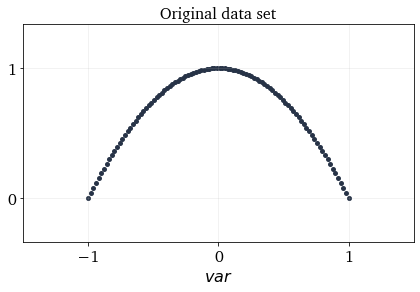

In [20]:
figure = plt.figure(figsize=(7, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(x, y, color=colors[0], marker='.', linewidth=data_point,)
plt.axis('equal')
plt.xlim([-1.5,1.5]), plt.ylim([0,1])
plt.xticks([-1,0,1]), plt.yticks([0,1])
plt.xlabel(r'$var$')
plt.grid(alpha=0.2)
plt.title('Original data set', fontsize=font_size)
if save_plots==True: plt.savefig('../images/tutorial-clustering-original-data-set.png', dpi = 500, bbox_inches='tight')

### Cluster with `variable_bins` into $k=4$ clusters:

In [21]:
(idx_variable_bins) = cl.variable_bins(x, 4, verbose=True)

Border values for each bin are:
[-1.0, -0.5, 0.0, 0.5, 1.0]

Bounds for cluster 1:
	-1.0, -0.5152
Bounds for cluster 2:
	-0.4949, -0.0101
Bounds for cluster 3:
	0.0101, 0.4949
Bounds for cluster 4:
	0.5152, 1.0


Visualize clustering of the data set:

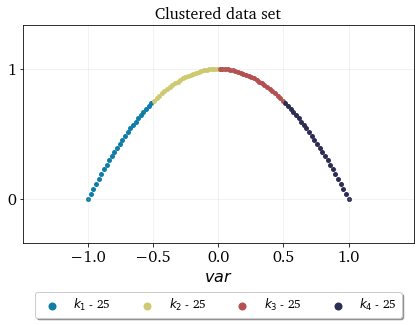

In [22]:
visualize_clustering(x, y, idx_variable_bins, [-1,-0.5,0,0.5,1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

### Cluster with `predefined_variable_bins` into $k=4$ clusters:

In [23]:
(idx_predefined_variable_bins) = cl.predefined_variable_bins(x, [-0.6, 0.4, 0.8], verbose=True)

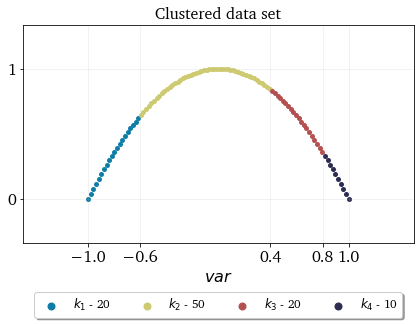

In [24]:
visualize_clustering(x, y, idx_predefined_variable_bins, [-1, -0.6, 0.4, 0.8, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-predefined-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

### Cluster with `mixture_fraction_bins`

In [27]:
# Z = np.linspace(0,1,100)
# (idx_mixture_fraction_bins) = cl.mixture_fraction_bins(Z, 4, 0.2, verbose=True)

### Cluster with `pc_source_bins` into $k=4$ clusters:

In [ ]:
(idx_pc_source_bins) = cl.pc_source_bins(x, 4, zero_offset_percentage=0.1, split_at_zero=False, verbose=False)